In [1]:
import os
import pandas as pd
from scipy.stats import pearsonr

In [2]:
import numpy as np

In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [4]:
import shap

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#download_dir = 'D:\\downloads'
download_dir = 'D:\\downloads\\amazon_customer_reviews'
print(download_dir)

D:\downloads\amazon_customer_reviews


In [7]:
df_sentence_filename = os.path.join(download_dir,"amazon_reviews_pickle_sentences_20240219.pkl")
df_sentence = pd.read_pickle(df_sentence_filename)

In [8]:
df_sentence

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,P_index,S_sentence_number,Sentence,Summary_vector,Sentence_vector
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_1,I have bought several of the Vitality canned d...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[0.065722205, 0.2194421, 0.05846874, 0.0385813..."
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_2,The product looks more like a stew than a proc...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[0.14764795, -0.03511758, -0.08398781, 0.22344..."
2,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_3,My Labrador is finicky and she appreciates thi...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[-0.019665075, 0.008361459, 0.18608305, -0.005..."
3,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,S_1,Product arrived labeled as Jumbo Salted Peanut...,"[-0.023735762, -0.12105397, -0.040553838, 0.09...","[0.1497032, -0.03296311, 0.08253966, 0.3397147..."
4,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,S_2,Not sure if this was an error or if the vendor...,"[-0.023735762, -0.12105397, -0.040553838, 0.09...","[0.011851987, 0.16143851, -0.3239239, -0.10479..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832747,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,P_568451,S_5,Sweet potato flavor also did not make my hand ...,"[0.25384724, -0.047404274, 0.24993208, 0.27432...","[-0.31468403, 0.1845763, 0.05035884, 0.1089965..."
2832748,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_1,These are the BEST treats for training and rew...,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[-0.011406189, 0.07397798, 0.1705112, 0.083042..."
2832749,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_2,Lower in calories and loved by all the doggies.,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[-0.2748866, -0.24761851, 0.037157476, -0.0911..."
2832750,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_3,Sweet potatoes seem to be their favorite Wet N...,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[0.04227521, 0.15279172, 0.31013608, 0.1316846..."


In [9]:
df_sentence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832752 entries, 0 to 2832751
Data columns (total 14 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   Id                      int64 
 1   ProductId               object
 2   UserId                  object
 3   ProfileName             object
 4   HelpfulnessNumerator    int64 
 5   HelpfulnessDenominator  int64 
 6   Score                   int64 
 7   Time                    int64 
 8   Summary                 object
 9   P_index                 object
 10  S_sentence_number       object
 11  Sentence                object
 12  Summary_vector          object
 13  Sentence_vector         object
dtypes: int64(5), object(9)
memory usage: 302.6+ MB


In [10]:
df_sentence.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,2.832752e+06,2.832752e+06,2.832752e+06,2.832752e+06,2.832752e+06
mean,2.829604e+05,2.603559e+00,3.170148e+00,4.122165e+00,1.297550e+09
std,1.638512e+05,1.305284e+01,1.381716e+01,1.346130e+00,4.723726e+07
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.393408e+08
25%,1.408130e+05,0.000000e+00,0.000000e+00,4.000000e+00,1.274486e+09
50%,2.815910e+05,1.000000e+00,1.000000e+00,5.000000e+00,1.311984e+09
75%,4.249200e+05,2.000000e+00,3.000000e+00,5.000000e+00,1.332979e+09
max,5.684540e+05,8.660000e+02,9.230000e+02,5.000000e+00,1.351210e+09


In [11]:
df_sentence['Score'].value_counts().sort_index()

Score
1     286263
2     157069
3     225887
4     418656
5    1744877
Name: count, dtype: int64

Score
1     286263
2     157069
3     225887
4     418656
5    1744877
Name: count, dtype: int64


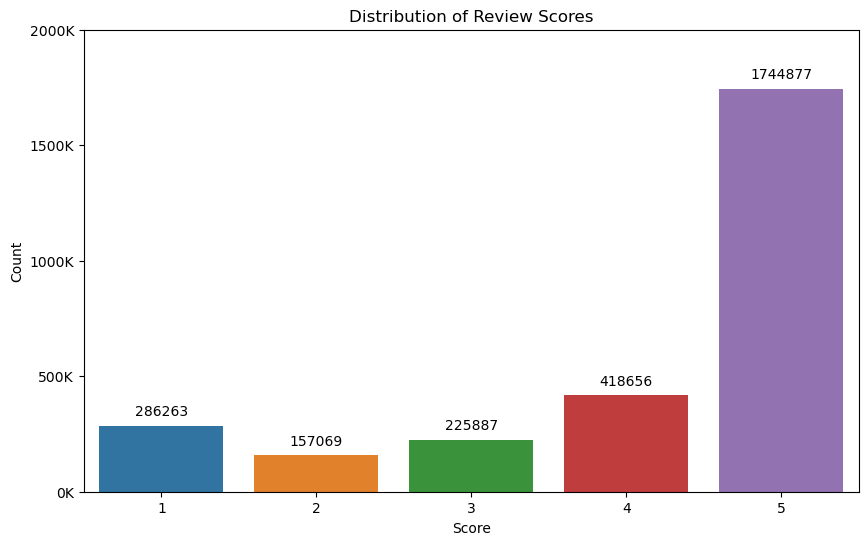

In [12]:
# Load your data
# Replace this with the actual loading code for your df_sentence DataFrame
# df_sentence = pd.read_csv('path/to/your/data.csv')

# Ensure 'Score' column is numeric and remove any NaN values
df_sentence['Score'] = pd.to_numeric(df_sentence['Score'], errors='coerce').dropna().astype(int)

# Get counts of each score
score_counts = df_sentence['Score'].value_counts().sort_index()
print(score_counts)

# Plot the distribution of review scores with correct y-axis scale
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=df_sentence['Score'])

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set the correct y-axis scale
y_ticks = [0, 500000, 1000000, 1500000, 2000000]
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{int(y/1000)}K' for y in y_ticks])

plt.title('Distribution of Review Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [13]:
df_with_intents_scores_progress_filename = os.path.join(download_dir,"amazon_reviews_pickle_sentences_with_intents_scores_progress_20240219.pkl")
df_with_intents_scores = pd.read_pickle(df_with_intents_scores_progress_filename)

In [14]:
df_with_intents_scores.columns

Index(['Sentence', 'Predicted Intent and Scores'], dtype='object')

In [15]:
df_sentence.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'P_index',
       'S_sentence_number', 'Sentence', 'Summary_vector', 'Sentence_vector'],
      dtype='object')

In [16]:
df_sentence

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,P_index,S_sentence_number,Sentence,Summary_vector,Sentence_vector
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_1,I have bought several of the Vitality canned d...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[0.065722205, 0.2194421, 0.05846874, 0.0385813..."
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_2,The product looks more like a stew than a proc...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[0.14764795, -0.03511758, -0.08398781, 0.22344..."
2,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_3,My Labrador is finicky and she appreciates thi...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[-0.019665075, 0.008361459, 0.18608305, -0.005..."
3,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,S_1,Product arrived labeled as Jumbo Salted Peanut...,"[-0.023735762, -0.12105397, -0.040553838, 0.09...","[0.1497032, -0.03296311, 0.08253966, 0.3397147..."
4,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,S_2,Not sure if this was an error or if the vendor...,"[-0.023735762, -0.12105397, -0.040553838, 0.09...","[0.011851987, 0.16143851, -0.3239239, -0.10479..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832747,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,P_568451,S_5,Sweet potato flavor also did not make my hand ...,"[0.25384724, -0.047404274, 0.24993208, 0.27432...","[-0.31468403, 0.1845763, 0.05035884, 0.1089965..."
2832748,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_1,These are the BEST treats for training and rew...,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[-0.011406189, 0.07397798, 0.1705112, 0.083042..."
2832749,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_2,Lower in calories and loved by all the doggies.,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[-0.2748866, -0.24761851, 0.037157476, -0.0911..."
2832750,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_3,Sweet potatoes seem to be their favorite Wet N...,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[0.04227521, 0.15279172, 0.31013608, 0.1316846..."


In [17]:
df_pickle_reduced_filename = os.path.join(download_dir,"amazon_reviews_pickle_paragraphs_similarity_reduced_20240219.pkl")

df_paragraph_reduced = pd.read_pickle(df_pickle_reduced_filename )

In [18]:
df_paragraph_reduced.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Paragraph',
       'Paragraph_Cluster', 'Paragraph_Distance', 'Summary_Cluster',
       'Summary_Distance', 'Summary_similarity_distance',
       'Summary_similarity_index', 'Paragraph_similarity_distance',
       'Paragraph_similarity_index'],
      dtype='object')

In [19]:
df_paragraph_reduced

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Paragraph,Paragraph_Cluster,Paragraph_Distance,Summary_Cluster,Summary_Distance,Summary_similarity_distance,Summary_similarity_index,Paragraph_similarity_distance,Paragraph_similarity_index
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,97.0,8.618866,72.0,18.906586,"[0.0, 0.0, 3.1913757, 3.4827728, 3.4827728, 4....","[382666, 0, 399359, 489673, 53168, 221484, 245...","[0.0, 9.213089, 9.347366, 9.460304, 9.700714, ...","[0, 357080, 399351, 118925, 87038, 174270, 779..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,33.0,17.032120,5.0,22.618835,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[285493, 245803, 302250, 188491, 238091, 38568...","[1.5258789e-05, 17.83287, 17.944412, 17.958954...","[1, 408473, 459824, 230876, 502381, 245616, 52..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,45.0,10.199005,85.0,31.144135,"[0.0, 33.637497, 33.637512, 37.27021, 37.70838...","[2, 64976, 28160, 11301, 147206, 95793, 85154,...","[0.0, 9.252136, 10.345474, 10.429405, 10.69094...","[2, 147481, 61165, 562474, 44533, 249156, 2522..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,10.665001,64.0,39.461334,"[1.5258789e-05, 3.0517578e-05, 3.0517578e-05, ...","[3, 544145, 115221, 136298, 303742, 469516, 44...","[0.0, 0.0, 0.0, 11.847763, 11.885223, 12.11344...","[544145, 136298, 3, 225916, 465204, 346282, 83..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,27.0,19.298927,34.0,33.462418,"[0.0, 0.0, 0.0, 9.131668, 9.131668, 12.024277,...","[4, 51225, 159975, 146806, 528095, 5, 380956, ...","[0.0, 20.675049, 20.70295, 20.70295, 21.00653,...","[4, 397071, 444462, 350394, 354337, 266557, 30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,36.0,13.868851,49.0,33.553879,"[0.0, 20.89943, 23.022507, 24.756912, 24.75691...","[568422, 276285, 415440, 552385, 479609, 43381...","[1.5258789e-05, 12.681763, 13.71727, 13.762024...","[568422, 269890, 560414, 55281, 511989, 100073..."
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,64.0,11.191422,29.0,6.516342,"[1.5258789e-05, 1.5258789e-05, 1.5258789e-05, ...","[4611, 5881, 7144, 7218, 7797, 7846, 8462, 917...","[1.5258789e-05, 12.566528, 12.566559, 12.61872...","[568423, 308784, 415165, 483205, 283181, 44304..."
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",86.0,9.182945,99.0,18.440742,"[0.0, 16.579681, 18.626549, 19.558243, 19.5885...","[568424, 316285, 498883, 555989, 337890, 28018...","[3.0517578e-05, 10.244698, 10.395744, 10.39574...","[568424, 69929, 501253, 175025, 344679, 485720..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,14.0,12.075760,49.0,23.086723,"[1.5258789e-05, 14.706032, 19.704666, 19.70466...","[568425, 36986, 336374, 143436, 66033, 556838,...","[1.5258789e-05, 12.124237, 12.395477, 12.39547...","[568425, 166517, 65940, 361011, 516386, 143343..."


In [20]:
df_with_intents_scores_progress_filename = os.path.join(download_dir,"amazon_reviews_pickle_sentences_with_intents_scores_progress_20240219.pkl")
df_with_intents_scores_progress = pd.read_pickle(df_with_intents_scores_progress_filename)

In [21]:
df_with_intents_scores_progress

,Sentence,Predicted Intent and Scores
0,I have bought several of the Vitality canned d...,"Value for Money: 0.98, Quality Appreciation: 0..."
1,The product looks more like a stew than a proc...,"Product Appearance: 0.96, Taste/Flavor Comment..."
2,My Labrador is finicky and she appreciates thi...,"Value for Money: 0.98, Comparison: 0.87, Purch..."
3,Product arrived labeled as Jumbo Salted Peanut...,"Misrepresentation: 1.00, Packaging Issue: 0.95..."
4,Not sure if this was an error or if the vendor...,No Intent Exceeds Threshold
...,...,...
499995,I went to my local warehouse store that starts...,"Value for Money: 0.98, Comparison: 0.87, Repea..."
499996,Seriously it is the same stuff they use in the...,Comparison: 0.92
499997,"If you ever visit the Carmike 14 in Tyler, TX ...",Value for Money: 0.81
499998,"My girlfriend and I love this stuff, and she w...","Value for Money: 0.85, Quality Appreciation: 0.82"


In [22]:
target_sentence, target_scores = df_with_intents_scores_progress.iloc[499999]
print(target_sentence)
print(target_scores)

This buttery salt tastes just like what you find in the theaters; however, be careful of the spout;  it pours very fast.
Taste/Flavor Comment: 0.94, Comparison: 0.85


In [23]:
def find_sentence(df, target_sentence, column):
    """
    Find the index of the row containing the target sentence in a specified column of a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame to search.
    - target_sentence (str): The sentence to find.
    - column (str): The column name where the sentence is expected to be found.
    
    Returns:
    - list: The list of indices where the target sentence is found.
    """
    return df[df[column].str.contains(target_sentence, na=False, case=False)].index.tolist()



In [24]:
# Example usage:
# Assuming 'df' is your DataFrame and 'sentence_column' is the name of the column to search.
indices = find_sentence(df_sentence, target_sentence, 'Sentence')
print(indices)

[499999]


In [25]:
df_sentence.iloc[indices]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,P_index,S_sentence_number,Sentence,Summary_vector,Sentence_vector
499999,99577,B0014A1BWQ,A1BQP6FA6183Q2,Marnie,1,1,5,1310688000,popcorn salt,P_99576,S_1,This buttery salt tastes just like what you fi...,"[0.05883035, 0.12144421, -0.4428516, 0.1602432...","[-0.31316534, 0.23747592, 0.14563388, 0.118244..."


In [26]:

def link_matching_rows(smaller_df, larger_df, smaller_col, larger_col):
    """
    Adds a new column to the smaller DataFrame that contains lists of row indices from the larger DataFrame
    where the sentences match exactly.

    Parameters:
    - smaller_df (pd.DataFrame): The smaller DataFrame with sentences to match.
    - larger_df (pd.DataFrame): The larger DataFrame to search for matching sentences.
    - smaller_col (str): The name of the column in the smaller DataFrame containing the sentences.
    - larger_col (str): The name of the column in the larger DataFrame containing the sentences.
    """
    # Creating a dictionary from the larger DataFrame for fast lookup
    sentence_to_rows = {}
    for index, row in larger_df.iterrows():
        sentence = row[larger_col]
        if sentence not in sentence_to_rows:
            sentence_to_rows[sentence] = []
        sentence_to_rows[sentence].append(index)
    
    # Mapping each sentence in the smaller DataFrame to the indices from the larger DataFrame
    smaller_df['matching_rows'] = smaller_df[smaller_col].apply(
        lambda x: sentence_to_rows.get(x, [])
    )

In [27]:
df_sentence

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,P_index,S_sentence_number,Sentence,Summary_vector,Sentence_vector
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_1,I have bought several of the Vitality canned d...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[0.065722205, 0.2194421, 0.05846874, 0.0385813..."
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_2,The product looks more like a stew than a proc...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[0.14764795, -0.03511758, -0.08398781, 0.22344..."
2,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,S_3,My Labrador is finicky and she appreciates thi...,"[0.10738717, 0.015432298, -0.28650856, 0.00476...","[-0.019665075, 0.008361459, 0.18608305, -0.005..."
3,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,S_1,Product arrived labeled as Jumbo Salted Peanut...,"[-0.023735762, -0.12105397, -0.040553838, 0.09...","[0.1497032, -0.03296311, 0.08253966, 0.3397147..."
4,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,S_2,Not sure if this was an error or if the vendor...,"[-0.023735762, -0.12105397, -0.040553838, 0.09...","[0.011851987, 0.16143851, -0.3239239, -0.10479..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832747,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,P_568451,S_5,Sweet potato flavor also did not make my hand ...,"[0.25384724, -0.047404274, 0.24993208, 0.27432...","[-0.31468403, 0.1845763, 0.05035884, 0.1089965..."
2832748,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_1,These are the BEST treats for training and rew...,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[-0.011406189, 0.07397798, 0.1705112, 0.083042..."
2832749,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_2,Lower in calories and loved by all the doggies.,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[-0.2748866, -0.24761851, 0.037157476, -0.0911..."
2832750,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,P_568452,S_3,Sweet potatoes seem to be their favorite Wet N...,"[0.19750828, -0.25577277, -0.14805606, 0.18790...","[0.04227521, 0.15279172, 0.31013608, 0.1316846..."


In [28]:
def compare_sentences_by_index(smaller_df, larger_df, smaller_col, larger_col):
    """
    Compares sentences from two DataFrames based on the same index and identifies discrepancies.

    Parameters:
    - smaller_df (pd.DataFrame): The smaller DataFrame with sentences.
    - larger_df (pd.DataFrame): The larger DataFrame with sentences.
    - smaller_col (str): Column name in the smaller DataFrame containing sentences.
    - larger_col (str): Column name in the larger DataFrame containing sentences.

    Returns:
    - pd.DataFrame: A DataFrame containing the indices and sentences from both DataFrames where they do not match.
    """
    # Ensure both DataFrames have the same index range for comparison
    common_indices = smaller_df.index.intersection(larger_df.index)
    # Create a DataFrame for discrepancies
    discrepancies = pd.DataFrame()

    for idx in common_indices:
        if smaller_df.at[idx, smaller_col] != larger_df.at[idx, larger_col]:
            discrepancies = discrepancies.append({
                'Index': idx,
                'Smaller_DF_Sentence': smaller_df.at[idx, smaller_col],
                'Larger_DF_Sentence': larger_df.at[idx, larger_col]
            }, ignore_index=True)
    
    return discrepancies

In [29]:
# Usage:
# Assuming df_small and df_large are your DataFrames and 'sentence_small' and 'sentence_large' are your column names.
discrepancies = compare_sentences_by_index(df_with_intents_scores_progress, df_sentence, 'Sentence', 'Sentence')
print(discrepancies)

Empty DataFrame
Columns: []
Index: []


In [30]:
df_with_intents_scores_progress

,Sentence,Predicted Intent and Scores
0,I have bought several of the Vitality canned d...,"Value for Money: 0.98, Quality Appreciation: 0..."
1,The product looks more like a stew than a proc...,"Product Appearance: 0.96, Taste/Flavor Comment..."
2,My Labrador is finicky and she appreciates thi...,"Value for Money: 0.98, Comparison: 0.87, Purch..."
3,Product arrived labeled as Jumbo Salted Peanut...,"Misrepresentation: 1.00, Packaging Issue: 0.95..."
4,Not sure if this was an error or if the vendor...,No Intent Exceeds Threshold
...,...,...
499995,I went to my local warehouse store that starts...,"Value for Money: 0.98, Comparison: 0.87, Repea..."
499996,Seriously it is the same stuff they use in the...,Comparison: 0.92
499997,"If you ever visit the Carmike 14 in Tyler, TX ...",Value for Money: 0.81
499998,"My girlfriend and I love this stuff, and she w...","Value for Money: 0.85, Quality Appreciation: 0.82"


In [31]:
def create_intent_result_df(large_df, small_df, num_rows, candidate_labels):
    """
    Create a new DataFrame from the first num_rows of large_df, structured with intent labels as columns.
    Populate this DataFrame using the intent scores from small_df.

    Parameters:
    - large_df (pd.DataFrame): The larger DataFrame.
    - small_df (pd.DataFrame): The smaller DataFrame with intent and scores.
    - num_rows (int): Number of rows to include from large_df in the new DataFrame.
    - candidate_labels (list): List of all possible intent labels.

    Returns:
    - pd.DataFrame: A new DataFrame with intents as columns, filled with scores.
    """
    # Create the new DataFrame from large_df
    intent_result_df = large_df.iloc[:num_rows].copy()
    
    # Initialize columns for each intent label in the new DataFrame
    for label in candidate_labels:
        intent_result_df[label] = 0.0  # Initialize with 0.0 for clarity, assuming no intent by default
    
    # Function to parse intent scores and update them in the new DataFrame
    def parse_and_fill_intents(row):
        intents_scores = row['Predicted Intent and Scores']
        if intents_scores != "No Intent Exceeds Threshold":
            intents_scores = intents_scores.split(', ')
            for item in intents_scores:
                intent, score = item.split(': ')
                intent_result_df.at[row.name, intent] = float(score)

    # Apply the function to the small_df
    small_df.apply(parse_and_fill_intents, axis=1)
    
    return intent_result_df

In [32]:
# Usage example:
candidate_labels = [
    "Quality Appreciation", "Product Description", "Product Appearance", "Preference Expression",
    "Packaging Issue", "Comparison", "Complaint", "Misrepresentation", "Historical Mention",
    "Taste/Flavor Comment", "Product Ingredients", "Value for Money", "Purchase Recommendation",
    "Usage Experience", "Product Efficacy", "Health and Safety Concerns", "Customer Service Experience",
    "Repeat Purchase Intention", "Emotional Response", "Environmental/Sustainability Mention"
]

In [33]:
intent_result_df = create_intent_result_df(df_sentence, df_with_intents_scores_progress, 500000, candidate_labels)
print(intent_result_df.head())

   Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
2   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
3   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   
4   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary P_index  \
0                       1      5  1303862400  Good Quality Dog Food     P_0   
1                       1      5  1303862400  Good Quality Dog Food     P_0   
2                       1      5  1303862400  Good Quality Dog Food     P_0   
3                       0      1  1346976000      Not as Advertised     P_1   
4                       0      1  1346976000      Not as Advertised     P_1   

   ... Product Ingredients Value for Money Purchase Recommendation  \
0  ...                 0.0  

In [34]:
intent_result_df.iloc[3]

Id                                                                                      2
ProductId                                                                      B00813GRG4
UserId                                                                     A1D87F6ZCVE5NK
ProfileName                                                                        dll pa
HelpfulnessNumerator                                                                    0
HelpfulnessDenominator                                                                  0
Score                                                                                   1
Time                                                                           1346976000
Summary                                                                 Not as Advertised
P_index                                                                               P_1
S_sentence_number                                                                     S_1
Sentence  

In [35]:
df_with_intents_scores_progress.iloc[3]['Predicted Intent and Scores']

'Misrepresentation: 1.00, Packaging Issue: 0.95, Product Appearance: 0.89, Comparison: 0.85'

In [36]:
def compute_correlations(df, score_column):
    """
    Compute the Pearson correlation coefficient between each intent tag and the score column.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the intent tags and score column.
    - score_column (str): Name of the column containing the scores.

    Returns:
    - pd.DataFrame: A DataFrame with each intent tag and its correlation coefficient to the score.
    """
    correlation_results = []
    
    # Iterate over columns (intent tags) except the score column and non-intent columns
    candidate_labels = [
        "Quality Appreciation", "Product Description", "Product Appearance", "Preference Expression",
        "Packaging Issue", "Comparison", "Complaint", "Misrepresentation", "Historical Mention",
        "Taste/Flavor Comment", "Product Ingredients", "Value for Money", "Purchase Recommendation",
        "Usage Experience", "Product Efficacy", "Health and Safety Concerns", "Customer Service Experience",
        "Repeat Purchase Intention", "Emotional Response", "Environmental/Sustainability Mention"
    ]
    for column in candidate_labels:
        correlation, _ = pearsonr(df[column], df[score_column])
        correlation_results.append({'Intent Tag': column, 'Correlation Coefficient': correlation})
    
    # Convert the results into a DataFrame for better visualization and sorting
    correlation_df = pd.DataFrame(correlation_results)
    correlation_df = correlation_df.sort_values(by='Correlation Coefficient', ascending=False)
    
    return correlation_df

In [37]:
intent_result_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'P_index',
       'S_sentence_number', 'Sentence', 'Summary_vector', 'Sentence_vector',
       'Quality Appreciation', 'Product Description', 'Product Appearance',
       'Preference Expression', 'Packaging Issue', 'Comparison', 'Complaint',
       'Misrepresentation', 'Historical Mention', 'Taste/Flavor Comment',
       'Product Ingredients', 'Value for Money', 'Purchase Recommendation',
       'Usage Experience', 'Product Efficacy', 'Health and Safety Concerns',
       'Customer Service Experience', 'Repeat Purchase Intention',
       'Emotional Response', 'Environmental/Sustainability Mention'],
      dtype='object')

In [38]:

correlation_df = compute_correlations(intent_result_df, 'Score')
print(correlation_df)

                              Intent Tag  Correlation Coefficient
11                       Value for Money                 0.261396
12               Purchase Recommendation                 0.192310
0                   Quality Appreciation                 0.174778
14                      Product Efficacy                 0.089774
9                   Taste/Flavor Comment                 0.072586
13                      Usage Experience                 0.045067
19  Environmental/Sustainability Mention                 0.031533
17             Repeat Purchase Intention                 0.018807
3                  Preference Expression                 0.009542
8                     Historical Mention                 0.006145
18                    Emotional Response                 0.003784
2                     Product Appearance                -0.000860
16           Customer Service Experience                -0.006091
10                   Product Ingredients                -0.015722
1         

In [39]:
# Convert correlation_df to a dictionary
correlation_coeffs = correlation_df.set_index('Intent Tag')['Correlation Coefficient'].to_dict()

In [40]:
def calculate_intent_model_score(row, correlation_coeffs):
    score = 0
    for intent, coeff in correlation_coeffs.items():
        intent_confidence = row[intent] / 100  # assuming confidence scores are percentages
        score += intent_confidence * coeff
    return score



In [41]:
# Add a new column for the intent model score
intent_result_df['Intent_Model_Score'] = intent_result_df.apply(calculate_intent_model_score, axis=1, args=(correlation_coeffs,))

In [42]:
intent_result_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'P_index',
       'S_sentence_number', 'Sentence', 'Summary_vector', 'Sentence_vector',
       'Quality Appreciation', 'Product Description', 'Product Appearance',
       'Preference Expression', 'Packaging Issue', 'Comparison', 'Complaint',
       'Misrepresentation', 'Historical Mention', 'Taste/Flavor Comment',
       'Product Ingredients', 'Value for Money', 'Purchase Recommendation',
       'Usage Experience', 'Product Efficacy', 'Health and Safety Concerns',
       'Customer Service Experience', 'Repeat Purchase Intention',
       'Emotional Response', 'Environmental/Sustainability Mention',
       'Intent_Model_Score'],
      dtype='object')

In [43]:
intent_result_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,P_index,...,Value for Money,Purchase Recommendation,Usage Experience,Product Efficacy,Health and Safety Concerns,Customer Service Experience,Repeat Purchase Intention,Emotional Response,Environmental/Sustainability Mention,Intent_Model_Score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,...,0.98,0.92,0.81,0.85,0.0,0.0,0.91,0.0,0.8,0.007085
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,...,0.81,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,-0.000227
2,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,...,0.98,0.87,0.00,0.82,0.0,0.0,0.00,0.0,0.0,0.006606
3,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,-0.004176
4,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,99575,B0014A1BWQ,A1884AZ07NI9GG,D.,11,13,3,1266105600,Pretty good,P_99574,...,0.98,0.00,0.00,0.00,0.0,0.0,0.83,0.0,0.0,0.002200
499996,99576,B0014A1BWQ,A8X08C6UQJPSV,S. C. Dominguez,5,6,5,1214179200,It's the same stuff they use at movie theaters,P_99575,...,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,-0.000547
499997,99576,B0014A1BWQ,A8X08C6UQJPSV,S. C. Dominguez,5,6,5,1214179200,It's the same stuff they use at movie theaters,P_99575,...,0.81,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.002117
499998,99576,B0014A1BWQ,A8X08C6UQJPSV,S. C. Dominguez,5,6,5,1214179200,It's the same stuff they use at movie theaters,P_99575,...,0.85,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.003655


In [44]:
intent_result_df.iloc[499997]

Id                                                                                  99576
ProductId                                                                      B0014A1BWQ
UserId                                                                      A8X08C6UQJPSV
ProfileName                                                               S. C. Dominguez
HelpfulnessNumerator                                                                    5
HelpfulnessDenominator                                                                  6
Score                                                                                   5
Time                                                                           1214179200
Summary                                    It's the same stuff they use at movie theaters
P_index                                                                           P_99575
S_sentence_number                                                                     S_2
Sentence  

In [45]:
df_paragraph_reduced.iloc[99575]['Paragraph']

'We have had some of this that we received from a friend. When we ran out, we had to search to find it and the only place we could find was Amazon. It is great popcorn salt to use with Wabash Valley Farms popcorn oil.'

In [46]:
import pandas as pd

# padding the index numbers of the p_index column so that sorting of sentences and paragraphs are correct.

# Extract the numeric part of the P_index and convert to integer
intent_result_df['P_index_numeric'] = intent_result_df['P_index'].str.extract('P_(\d+)').astype(int)

# Optional: Create a zero-padded P_index if you want to maintain a string format with standard width
intent_result_df['P_index_padded'] = 'P_' + intent_result_df['P_index_numeric'].apply(lambda x: f'{x:05d}')  # Adjust the zero padding as needed

# Now you can sort by this new column
intent_result_df = intent_result_df.sort_values(by='P_index_numeric')

In [47]:
intent_result_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,P_index,...,Usage Experience,Product Efficacy,Health and Safety Concerns,Customer Service Experience,Repeat Purchase Intention,Emotional Response,Environmental/Sustainability Mention,Intent_Model_Score,P_index_numeric,P_index_padded
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,...,0.81,0.85,0.0,0.0,0.91,0.0,0.8,0.007085,0,P_00000
1,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,-0.000227,0,P_00000
2,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,P_0,...,0.00,0.82,0.0,0.0,0.00,0.0,0.0,0.006606,0,P_00000
3,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,-0.004176,1,P_00001
4,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,P_1,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.000000,1,P_00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499992,99575,B0014A1BWQ,A1884AZ07NI9GG,D.,11,13,3,1266105600,Pretty good,P_99574,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.000697,99574,P_99574
499997,99576,B0014A1BWQ,A8X08C6UQJPSV,S. C. Dominguez,5,6,5,1214179200,It's the same stuff they use at movie theaters,P_99575,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.002117,99575,P_99575
499998,99576,B0014A1BWQ,A8X08C6UQJPSV,S. C. Dominguez,5,6,5,1214179200,It's the same stuff they use at movie theaters,P_99575,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.003655,99575,P_99575
499996,99576,B0014A1BWQ,A8X08C6UQJPSV,S. C. Dominguez,5,6,5,1214179200,It's the same stuff they use at movie theaters,P_99575,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,-0.000547,99575,P_99575


In [48]:
intent_result_df.iloc[0]

Id                                                                                      1
ProductId                                                                      B001E4KFG0
UserId                                                                     A3SGXH7AUHU8GW
ProfileName                                                                    delmartian
HelpfulnessNumerator                                                                    1
HelpfulnessDenominator                                                                  1
Score                                                                                   5
Time                                                                           1303862400
Summary                                                             Good Quality Dog Food
P_index                                                                               P_0
S_sentence_number                                                                     S_1
Sentence  

In [49]:
print(intent_result_df[['P_index', 'Score']].head())

  P_index  Score
0     P_0      5
1     P_0      5
2     P_0      5
3     P_1      1
4     P_1      1


In [50]:
# make paragraph_results_df

In [51]:
# List of all intent tags
candidate_labels = [
    "Quality Appreciation", "Product Description", "Product Appearance",
    "Preference Expression", "Packaging Issue", "Comparison", "Complaint",
    "Misrepresentation", "Historical Mention", "Taste/Flavor Comment",
    "Product Ingredients", "Value for Money", "Purchase Recommendation",
    "Usage Experience", "Product Efficacy", "Health and Safety Concerns",
    "Customer Service Experience", "Repeat Purchase Intention",
    "Emotional Response", "Environmental/Sustainability Mention"
]

# Aggregate these intent scores by 'P_index' using the mean to summarize them at the paragraph level
paragraph_results_df = intent_result_df.groupby('P_index')[candidate_labels].mean().reset_index()

# If you need to include the original score for each paragraph (assuming it's the same for all sentences in a paragraph)
paragraph_results_df = paragraph_results_df.merge(
    intent_result_df[['P_index', 'Score']].drop_duplicates(),
    on='P_index',
    how='left'
)

In [52]:
# List of all intent tags
candidate_labels = [
    "Quality Appreciation", "Product Description", "Product Appearance",
    "Preference Expression", "Packaging Issue", "Comparison", "Complaint",
    "Misrepresentation", "Historical Mention", "Taste/Flavor Comment",
    "Product Ingredients", "Value for Money", "Purchase Recommendation",
    "Usage Experience", "Product Efficacy", "Health and Safety Concerns",
    "Customer Service Experience", "Repeat Purchase Intention",
    "Emotional Response", "Environmental/Sustainability Mention"
]
# Include 'P_index_numeric' in the aggregation process
paragraph_results_df = intent_result_df.groupby(['P_index', 'P_index_numeric'])[candidate_labels].mean().reset_index()

# Merge the Score from intent_result_df
paragraph_results_df = paragraph_results_df.merge(
    intent_result_df[['P_index', 'P_index_numeric', 'Score']].drop_duplicates(),
    on=['P_index', 'P_index_numeric'],
    how='left'
)

In [53]:
paragraph_results_df

,P_index,P_index_numeric,Quality Appreciation,Product Description,Product Appearance,Preference Expression,Packaging Issue,Comparison,Complaint,Misrepresentation,...,Value for Money,Purchase Recommendation,Usage Experience,Product Efficacy,Health and Safety Concerns,Customer Service Experience,Repeat Purchase Intention,Emotional Response,Environmental/Sustainability Mention,Score
0,P_0,0,0.610000,0.0,0.320000,0.0000,0.000,0.863333,0.00,0.276667,...,0.923333,0.596667,0.270000,0.556667,0.0,0.00,0.303333,0.0000,0.266667,5
1,P_1,1,0.000000,0.0,0.445000,0.0000,0.475,0.425000,0.00,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0000,0.000000,1
2,P_10,10,0.447500,0.0,0.000000,0.0000,0.000,0.205000,0.00,0.000000,...,0.637500,0.207500,0.000000,0.000000,0.0,0.23,0.237500,0.2175,0.207500,5
3,P_100,100,0.000000,0.0,0.000000,0.0000,0.000,0.000000,0.00,0.000000,...,0.000000,0.280000,0.000000,0.000000,0.0,0.00,0.000000,0.3000,0.000000,5
4,P_1000,1000,0.316667,0.0,0.000000,0.0000,0.000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0000,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99570,P_9995,9995,0.217500,0.0,0.000000,0.2375,0.000,0.415000,0.00,0.000000,...,0.222500,0.232500,0.440000,0.000000,0.0,0.00,0.212500,0.0000,0.232500,1
99571,P_9996,9996,0.242500,0.0,0.000000,0.2275,0.000,0.452500,0.22,0.000000,...,0.412500,0.215000,0.210000,0.205000,0.0,0.00,0.000000,0.0000,0.455000,5
99572,P_9997,9997,0.163000,0.0,0.000000,0.0000,0.000,0.250000,0.00,0.081000,...,0.363000,0.172000,0.096000,0.087000,0.0,0.00,0.000000,0.0000,0.096000,5
99573,P_9998,9998,0.000000,0.0,0.000000,0.0000,0.000,0.000000,0.00,0.000000,...,0.950000,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0000,0.000000,5


In [54]:
df_paragraph_reduced.reset_index(inplace=True)

# Merge using 'P_index_numeric'
paragraph_results_df = paragraph_results_df.merge(
    df_paragraph_reduced[['index', 'Summary', 'Paragraph']],
    left_on='P_index_numeric',
    right_on='index',
    how='left'
)

# Clean up by dropping the now unnecessary 'index' column from the merge
paragraph_results_df.drop('index', axis=1, inplace=True)

In [55]:
paragraph_results_df

,P_index,P_index_numeric,Quality Appreciation,Product Description,Product Appearance,Preference Expression,Packaging Issue,Comparison,Complaint,Misrepresentation,...,Usage Experience,Product Efficacy,Health and Safety Concerns,Customer Service Experience,Repeat Purchase Intention,Emotional Response,Environmental/Sustainability Mention,Score,Summary,Paragraph
0,P_0,0,0.610000,0.0,0.320000,0.0000,0.000,0.863333,0.00,0.276667,...,0.270000,0.556667,0.0,0.00,0.303333,0.0000,0.266667,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,P_1,1,0.000000,0.0,0.445000,0.0000,0.475,0.425000,0.00,0.500000,...,0.000000,0.000000,0.0,0.00,0.000000,0.0000,0.000000,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,P_10,10,0.447500,0.0,0.000000,0.0000,0.000,0.205000,0.00,0.000000,...,0.000000,0.000000,0.0,0.23,0.237500,0.2175,0.207500,5,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
3,P_100,100,0.000000,0.0,0.000000,0.0000,0.000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.0,0.00,0.000000,0.3000,0.000000,5,Taste wise it is a 6 star item,"The mouth says, ""How do I love thee, let me co..."
4,P_1000,1000,0.316667,0.0,0.000000,0.0000,0.000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.0,0.00,0.000000,0.0000,0.000000,5,best babka,I never in my life tasted such a good babka it...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99570,P_9995,9995,0.217500,0.0,0.000000,0.2375,0.000,0.415000,0.00,0.000000,...,0.440000,0.000000,0.0,0.00,0.212500,0.0000,0.232500,1,constipation,we switched from the advance similac to the or...
99571,P_9996,9996,0.242500,0.0,0.000000,0.2275,0.000,0.452500,0.22,0.000000,...,0.210000,0.205000,0.0,0.00,0.000000,0.0000,0.455000,5,Constipation Not A Problem if...,"Like the bad reviews say, the organic formula ..."
99572,P_9997,9997,0.163000,0.0,0.000000,0.0000,0.000,0.250000,0.00,0.081000,...,0.096000,0.087000,0.0,0.00,0.000000,0.0000,0.096000,5,Love this formula!,I wanted to solely breastfeed but was unable t...
99573,P_9998,9998,0.000000,0.0,0.000000,0.0000,0.000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.0,0.00,0.000000,0.0000,0.000000,5,very convenient,i love the fact that i can get this delieved t...


In [56]:
paragraph_results_df.iloc[0]

P_index                                                                               P_0
P_index_numeric                                                                         0
Quality Appreciation                                                                 0.61
Product Description                                                                   0.0
Product Appearance                                                                   0.32
Preference Expression                                                                 0.0
Packaging Issue                                                                       0.0
Comparison                                                                       0.863333
Complaint                                                                             0.0
Misrepresentation                                                                0.276667
Historical Mention                                                                    0.0
Taste/Flav

In [57]:
# Check the first few rows to ensure everything looks correct
print(paragraph_results_df[['P_index', 'P_index_numeric', 'Summary', 'Paragraph', 'Score']].head())

  P_index  P_index_numeric                          Summary  \
0     P_0                0            Good Quality Dog Food   
1     P_1                1                Not as Advertised   
2    P_10               10  The Best Hot Sauce in the World   
3   P_100              100   Taste wise it is a 6 star item   
4  P_1000             1000                       best babka   

                                           Paragraph  Score  
0  I have bought several of the Vitality canned d...      5  
1  Product arrived labeled as Jumbo Salted Peanut...      1  
2  I don't know if it's the cactus or the tequila...      5  
3  The mouth says, "How do I love thee, let me co...      5  
4  I never in my life tasted such a good babka it...      5  


In [58]:
#random forest classifier

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the features and the target variable
X = paragraph_results_df[candidate_labels]  # candidate_labels should list all your intent tag columns
y = paragraph_results_df['Score']  # This is the target variable you are trying to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.63      0.58      1811
           2       0.45      0.23      0.31      1113
           3       0.47      0.27      0.35      1623
           4       0.60      0.22      0.32      2982
           5       0.78      0.95      0.86     12386

    accuracy                           0.72     19915
   macro avg       0.57      0.46      0.48     19915
weighted avg       0.69      0.72      0.68     19915

Accuracy: 0.7185538538789857


In [62]:
# Predict scores for the entire dataset
full_predictions = clf.predict(X)

# Add these predictions to your DataFrame
paragraph_results_df['Predicted_Score'] = full_predictions

In [63]:
# Display a sample of the DataFrame including the actual and predicted scores
print(paragraph_results_df[['Score', 'Predicted_Score']].head())

   Score  Predicted_Score
0      5                5
1      1                1
2      5                5
3      5                5
4      5                5


In [64]:
# examining mismatch predictions

In [65]:
paragraph_results_df.columns

Index(['P_index', 'P_index_numeric', 'Quality Appreciation',
       'Product Description', 'Product Appearance', 'Preference Expression',
       'Packaging Issue', 'Comparison', 'Complaint', 'Misrepresentation',
       'Historical Mention', 'Taste/Flavor Comment', 'Product Ingredients',
       'Value for Money', 'Purchase Recommendation', 'Usage Experience',
       'Product Efficacy', 'Health and Safety Concerns',
       'Customer Service Experience', 'Repeat Purchase Intention',
       'Emotional Response', 'Environmental/Sustainability Mention', 'Score',
       'Summary', 'Paragraph', 'Predicted_Score'],
      dtype='object')

In [66]:
# Create a mask for mismatched predictions
mismatch_mask = paragraph_results_df['Score'] != paragraph_results_df['Predicted_Score']

# Filter the DataFrame to only include mismatched predictions
mismatched_rows = paragraph_results_df[mismatch_mask]

In [67]:
mismatched_rows

,P_index,P_index_numeric,Quality Appreciation,Product Description,Product Appearance,Preference Expression,Packaging Issue,Comparison,Complaint,Misrepresentation,...,Product Efficacy,Health and Safety Concerns,Customer Service Experience,Repeat Purchase Intention,Emotional Response,Environmental/Sustainability Mention,Score,Summary,Paragraph,Predicted_Score
8,P_10003,10003,0.000000,0.0,0.000000,0.0,0.0,0.131429,0.117143,0.00000,...,0.000000,0.0,0.0,0.00000,0.137143,0.000000,1,Horribly Constipating,My child was exclusively breastfed for 4 1/2 m...,2
53,P_10044,10044,0.170000,0.0,0.000000,0.0,0.0,0.340000,0.544000,0.16600,...,0.000000,0.0,0.0,0.18600,0.000000,0.162000,1,Disappointed,I was very disappointed with the quality of th...,2
87,P_10075,10075,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.00000,0.000000,0.000000,3,Micro Pork Rinds,We own a small neighborhood bar and the patron...,5
88,P_10076,10076,0.208750,0.0,0.000000,0.0,0.0,0.220000,0.111250,0.21375,...,0.000000,0.0,0.0,0.10875,0.000000,0.000000,3,"Pretty good, but I am not sure that I will buy...",It was quite a commitment for me to buy this q...,5
103,P_1009,1009,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.22750,0.000000,0.227500,2,a little too sweet,Ive been craving some deer jerky for a while s...,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99525,P_99573,99573,0.135714,0.0,0.000000,0.0,0.0,0.130000,0.000000,0.00000,...,0.000000,0.0,0.0,0.00000,0.000000,0.000000,4,Finally! Theatre-tasting popcorn at home!,After years of trying every popcorn maker in t...,5
99528,P_99576,99576,0.000000,0.0,0.000000,0.0,0.0,0.850000,0.000000,0.00000,...,0.000000,0.0,0.0,0.00000,0.000000,0.000000,5,popcorn salt,This buttery salt tastes just like what you fi...,4
99541,P_9969,9969,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.00000,0.000000,0.000000,5,Great,"I really like them, I add them to my smoothies...",4
99546,P_9973,9973,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,...,0.000000,0.0,0.0,0.20500,0.000000,0.240000,3,Its a seed,I bought these to put in smoothies and they do...,5


In [68]:
# Print the mismatched rows
print(mismatched_rows[['P_index', 'Score', 'Predicted_Score'] + candidate_labels])



       P_index  Score  Predicted_Score  Quality Appreciation  \
8      P_10003      1                2              0.000000   
53     P_10044      1                2              0.170000   
87     P_10075      3                5              0.000000   
88     P_10076      3                5              0.208750   
103     P_1009      2                5              0.000000   
...        ...    ...              ...                   ...   
99525  P_99573      4                5              0.135714   
99528  P_99576      5                4              0.000000   
99541   P_9969      5                4              0.000000   
99546   P_9973      3                5              0.000000   
99574   P_9999      4                5              0.000000   

       Product Description  Product Appearance  Preference Expression  \
8                      0.0            0.000000                    0.0   
53                     0.0            0.000000                    0.0   
87          

In [69]:
# Optionally, you can also view summary statistics or counts of actual vs. predicted scores
print(mismatched_rows[['Score', 'Predicted_Score']].describe())


             Score  Predicted_Score
count  6514.000000      6514.000000
mean      3.189285         3.953792
std       1.204909         1.540242
min       1.000000         1.000000
25%       2.000000         3.000000
50%       4.000000         5.000000
75%       4.000000         5.000000
max       5.000000         5.000000


In [70]:
print(mismatched_rows['Score'].value_counts())


Score
4    2628
3    1388
2     977
1     865
5     656
Name: count, dtype: int64


In [71]:
print(mismatched_rows['Predicted_Score'].value_counts())

Predicted_Score
5    4081
1    1057
3     551
4     495
2     330
Name: count, dtype: int64


In [72]:
# Example: Inspecting cases where the actual score was 5, but predicted differently
score_5_mismatches = mismatched_rows[mismatched_rows['Score'] == 5]
print(score_5_mismatches[['P_index', 'Score', 'Predicted_Score'] + candidate_labels])

       P_index  Score  Predicted_Score  Quality Appreciation  \
362    P_10322      5                3                  0.00   
524    P_10469      5                4                  0.91   
575    P_10514      5                4                  0.00   
712    P_10638      5                1                  0.00   
902    P_10809      5                4                  0.00   
...        ...    ...              ...                   ...   
99144   P_9923      5                4                  0.00   
99197  P_99278      5                4                  0.00   
99444   P_9950      5                4                  0.00   
99528  P_99576      5                4                  0.00   
99541   P_9969      5                4                  0.00   

       Product Description  Product Appearance  Preference Expression  \
362                    0.0                0.00               0.094444   
524                    0.0                0.00               0.000000   
575         

In [73]:
# Analyzing common themes in descriptions or summaries for mismatches
common_phrases_mismatches = mismatched_rows['Paragraph'].value_counts().head(10)
print("Common phrases in mismatches:\n", common_phrases_mismatches)

Common phrases in mismatches:
 Paragraph
Just got this order and it is ok. A bit light on the cheddar flavoring and herb taste eludes me, if it is there.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       5
these chips are good, and bad, and create moral dilemmas constantly. If wou are strong at will, or having a large BBQ go for it, but as for me, i was in the habit of bringing a new bag to work every three days, had to put in a lot of time on the 

In [74]:
# Feature importance

In [75]:
# Extract feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to view the importances alongside the feature names
importances_df = pd.DataFrame({
    'Feature': candidate_labels,
    'Importance': feature_importances
})

# Sort the DataFrame to see the most important features at the top
importances_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importances_df)

                                 Feature  Importance
11                       Value for Money    0.137134
9                   Taste/Flavor Comment    0.117564
7                      Misrepresentation    0.114603
5                             Comparison    0.107635
12               Purchase Recommendation    0.083547
6                              Complaint    0.072466
0                   Quality Appreciation    0.067352
19  Environmental/Sustainability Mention    0.063064
17             Repeat Purchase Intention    0.046547
18                    Emotional Response    0.031165
14                      Product Efficacy    0.029852
2                     Product Appearance    0.024866
4                        Packaging Issue    0.022155
13                      Usage Experience    0.020348
3                  Preference Expression    0.018925
16           Customer Service Experience    0.013357
10                   Product Ingredients    0.011101
15            Health and Safety Concerns    0.

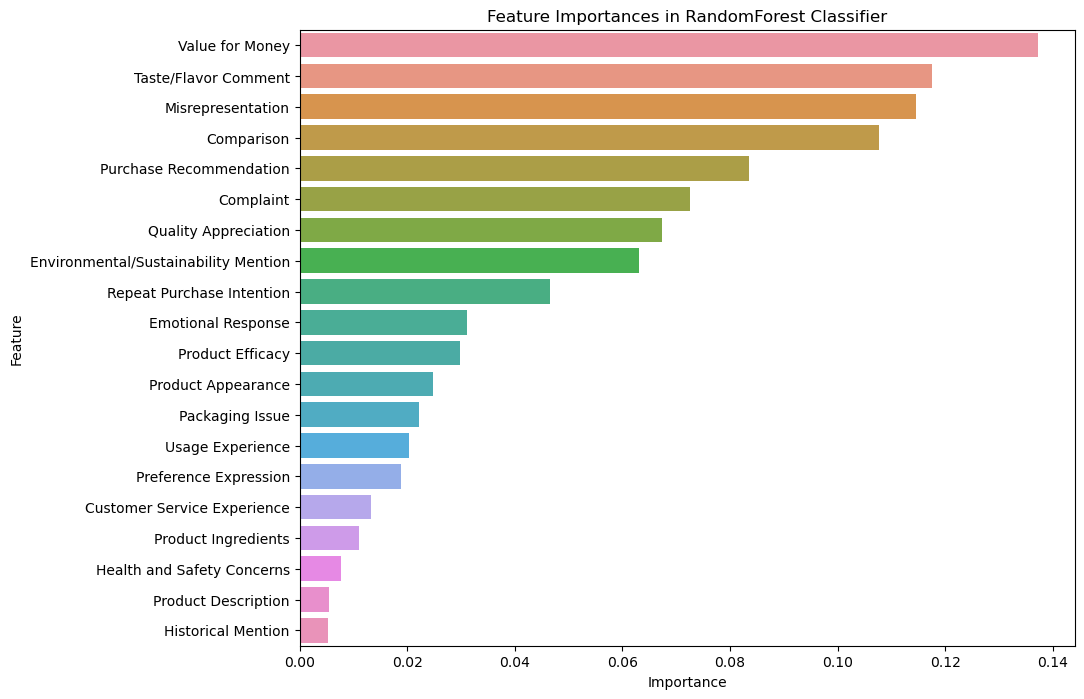

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in RandomForest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [77]:
# Calculate the length of each review
df_sentence['Review_Length'] = df_sentence['Sentence'].apply(lambda x: len(x.split()))


In [78]:
df_sentence['Review_Length'].describe()

count    2.832752e+06
mean     1.611923e+01
std      1.286050e+01
min      1.000000e+00
25%      8.000000e+00
50%      1.300000e+01
75%      2.000000e+01
max      1.462000e+03
Name: Review_Length, dtype: float64

d:\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


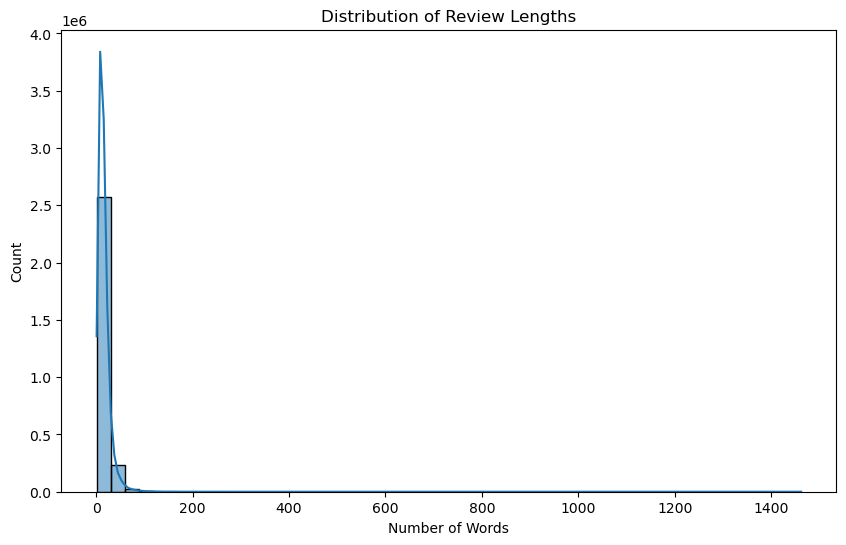

In [79]:

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_sentence['Review_Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

In [80]:
# Ensure 'Score' and 'Predicted_Score' are integers
paragraph_results_df['Score'] = paragraph_results_df['Score'].astype(int)
paragraph_results_df['Predicted_Score'] = paragraph_results_df['Predicted_Score'].astype(int)

# Calculate accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(paragraph_results_df['Score'], paragraph_results_df['Predicted_Score'])
print(f'Accuracy: {accuracy:.4f}')

# Create a mask for mismatched predictions
mismatch_mask = paragraph_results_df['Score'] != paragraph_results_df['Predicted_Score']

# Filter the DataFrame to only include mismatched predictions
mismatched_rows = paragraph_results_df[mismatch_mask]
mismatched_count = len(mismatched_rows)
total_count = len(paragraph_results_df)

# Calculate the percentage of mismatched predictions
mismatch_percentage = (mismatched_count / total_count) * 100
print(f'Mismatched Predictions: {mismatched_count} out of {total_count} ({mismatch_percentage:.2f}%)')

Accuracy: 0.9346
Mismatched Predictions: 6514 out of 99575 (6.54%)


                                 Feature  Importance
11                       Value for Money    0.138526
9                   Taste/Flavor Comment    0.117832
7                      Misrepresentation    0.115290
5                             Comparison    0.107788
12               Purchase Recommendation    0.083901
6                              Complaint    0.069182
0                   Quality Appreciation    0.067292
19  Environmental/Sustainability Mention    0.063226
17             Repeat Purchase Intention    0.047441
18                    Emotional Response    0.030976
14                      Product Efficacy    0.029808
2                     Product Appearance    0.024928
4                        Packaging Issue    0.021956
13                      Usage Experience    0.020870
3                  Preference Expression    0.018737
16           Customer Service Experience    0.013449
10                   Product Ingredients    0.011086
15            Health and Safety Concerns    0.

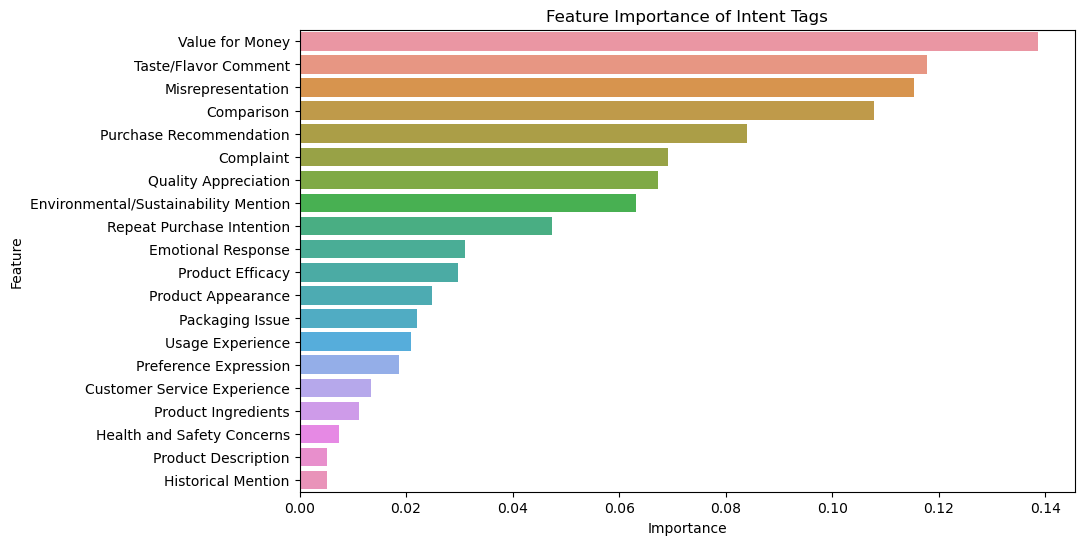

In [81]:
# Prepare data for Random Forest
X = paragraph_results_df.drop(columns=['P_index', 'P_index_numeric', 'Score', 'Summary', 'Paragraph', 'Predicted_Score'])
y = paragraph_results_df['Score']

# Train the Random Forest model
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_
features = X.columns

# Create a dataframe for feature importances
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance of Intent Tags')
plt.show()

In [82]:
# Ensure 'Score' and 'Predicted_Score' are integers
paragraph_results_df['Score'] = paragraph_results_df['Score'].astype(int)
paragraph_results_df['Predicted_Score'] = paragraph_results_df['Predicted_Score'].astype(int)

# Calculate accuracy of the model
accuracy = accuracy_score(paragraph_results_df['Score'], paragraph_results_df['Predicted_Score'])
print(f'Accuracy: {accuracy:.4f}')

# Create a mask for mismatched predictions
mismatch_mask = paragraph_results_df['Score'] != paragraph_results_df['Predicted_Score']

# Filter the DataFrame to only include mismatched predictions
mismatched_rows = paragraph_results_df[mismatch_mask]
mismatched_count = len(mismatched_rows)
total_count = len(paragraph_results_df)

# Calculate the percentage of mismatched predictions
mismatch_percentage = (mismatched_count / total_count) * 100
print(f'Mismatched Predictions: {mismatched_count} out of {total_count} ({mismatch_percentage:.2f}%)')

Accuracy: 0.9346
Mismatched Predictions: 6514 out of 99575 (6.54%)


                                 Feature  Importance
11                       Value for Money    0.135205
9                   Taste/Flavor Comment    0.117651
7                      Misrepresentation    0.115850
5                             Comparison    0.107487
12               Purchase Recommendation    0.084256
6                              Complaint    0.071386
0                   Quality Appreciation    0.068042
19  Environmental/Sustainability Mention    0.063801
17             Repeat Purchase Intention    0.047333
18                    Emotional Response    0.030799
14                      Product Efficacy    0.029537
2                     Product Appearance    0.024687
4                        Packaging Issue    0.021851
13                      Usage Experience    0.020909
3                  Preference Expression    0.018921
16           Customer Service Experience    0.013357
10                   Product Ingredients    0.011117
15            Health and Safety Concerns    0.

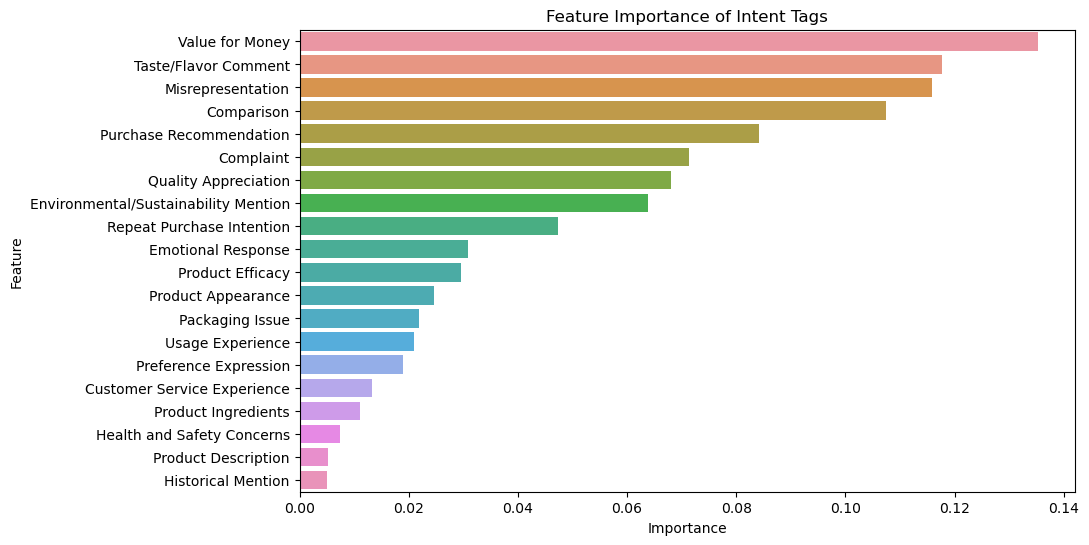

In [83]:
# Prepare data for Random Forest
X = paragraph_results_df.drop(columns=['P_index', 'P_index_numeric', 'Score', 'Summary', 'Paragraph', 'Predicted_Score'])
y = paragraph_results_df['Score']

# Train the Random Forest model
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_
features = X.columns

# Create a dataframe for feature importances
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance of Intent Tags')
plt.show()

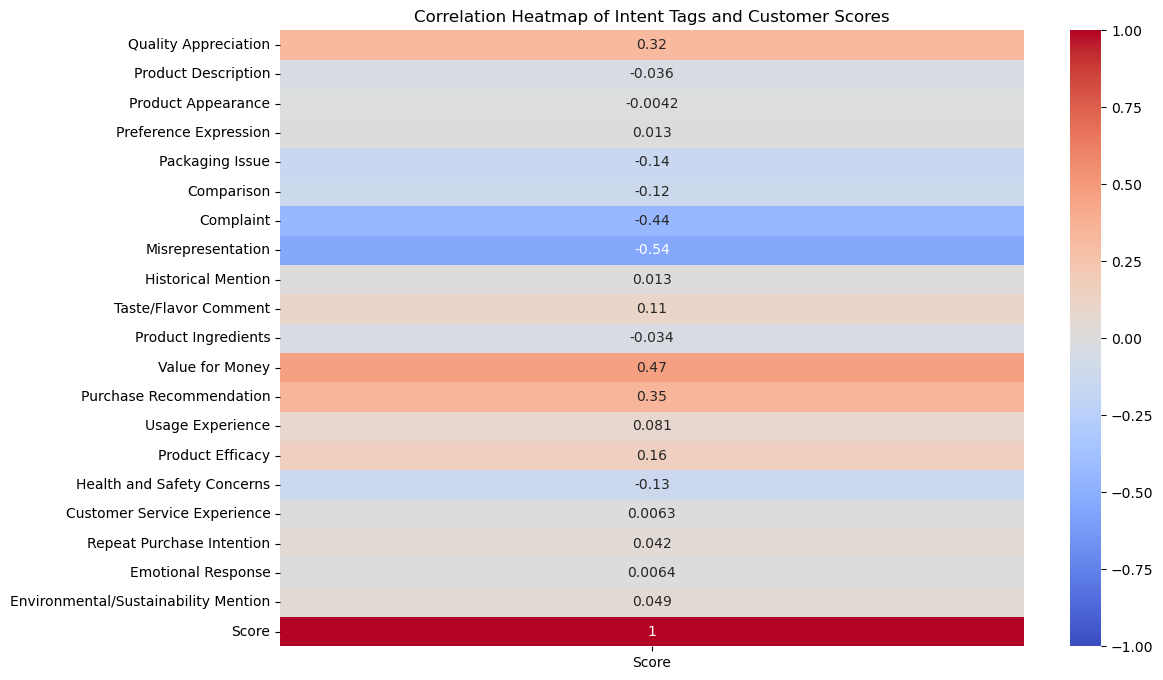

                                         Score
Quality Appreciation                  0.315707
Product Description                  -0.035690
Product Appearance                   -0.004161
Preference Expression                 0.013070
Packaging Issue                      -0.144072
Comparison                           -0.124521
Complaint                            -0.443935
Misrepresentation                    -0.542647
Historical Mention                    0.012901
Taste/Flavor Comment                  0.109212
Product Ingredients                  -0.034108
Value for Money                       0.467660
Purchase Recommendation               0.349912
Usage Experience                      0.080553
Product Efficacy                      0.162708
Health and Safety Concerns           -0.132032
Customer Service Experience           0.006275
Repeat Purchase Intention             0.041669
Emotional Response                    0.006448
Environmental/Sustainability Mention  0.048773
Score        

In [84]:
# Ensure 'Score' column is included by temporarily converting it to float
paragraph_results_df['Score'] = paragraph_results_df['Score'].astype(float)

# Filter the DataFrame to include only numeric columns
numeric_df = paragraph_results_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Score']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Intent Tags and Customer Scores')
plt.show()

# Display the correlation matrix for better visualization
print(corr_matrix[['Score']])

# Convert 'Score' column back to int if needed
paragraph_results_df['Score'] = paragraph_results_df['Score'].astype(int)

In [87]:
# Prepare data for Random Forest
X = paragraph_results_df.drop(columns=['P_index', 'P_index_numeric', 'Score', 'Summary', 'Paragraph', 'Predicted_Score'])
y = paragraph_results_df['Score']

# Train the Random Forest model
clf = RandomForestClassifier()
clf.fit(X, y)

RandomForestClassifier()

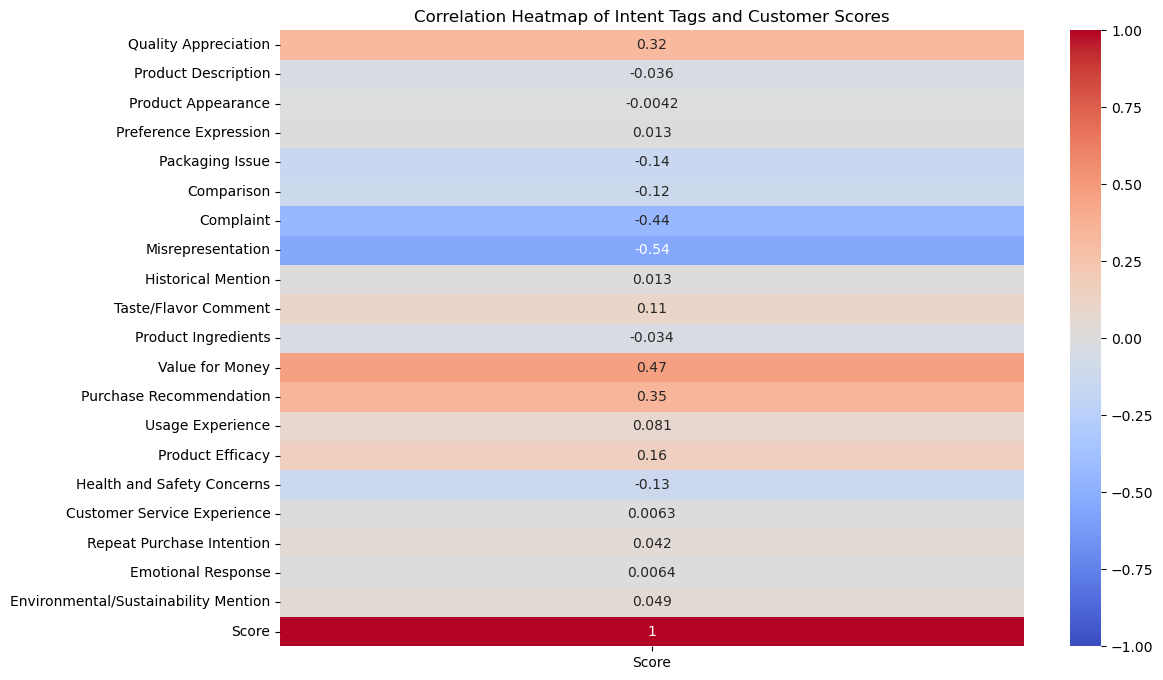

                                         Score
Quality Appreciation                  0.315707
Product Description                  -0.035690
Product Appearance                   -0.004161
Preference Expression                 0.013070
Packaging Issue                      -0.144072
Comparison                           -0.124521
Complaint                            -0.443935
Misrepresentation                    -0.542647
Historical Mention                    0.012901
Taste/Flavor Comment                  0.109212
Product Ingredients                  -0.034108
Value for Money                       0.467660
Purchase Recommendation               0.349912
Usage Experience                      0.080553
Product Efficacy                      0.162708
Health and Safety Concerns           -0.132032
Customer Service Experience           0.006275
Repeat Purchase Intention             0.041669
Emotional Response                    0.006448
Environmental/Sustainability Mention  0.048773
Score        

In [89]:
# Ensure 'Score' column is included by temporarily converting it to float
paragraph_results_df['Score'] = paragraph_results_df['Score'].astype(float)

# Filter the DataFrame to include only numeric columns
numeric_df = paragraph_results_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Score']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Intent Tags and Customer Scores')
plt.show()

# Display the correlation matrix for better visualization
print(corr_matrix[['Score']])

# Convert 'Score' column back to int if needed
paragraph_results_df['Score'] = paragraph_results_df['Score'].astype(int)

In [91]:
from sklearn.inspection import permutation_importance

                                 Feature  Importance
11                       Value for Money    0.053468
5                             Comparison    0.050756
9                   Taste/Flavor Comment    0.041427
12               Purchase Recommendation    0.038830
0                   Quality Appreciation    0.038588
7                      Misrepresentation    0.030433
19  Environmental/Sustainability Mention    0.021423
6                              Complaint    0.018913
17             Repeat Purchase Intention    0.015239
18                    Emotional Response    0.013577
14                      Product Efficacy    0.013430
2                     Product Appearance    0.006698
13                      Usage Experience    0.006590
4                        Packaging Issue    0.005447
16           Customer Service Experience    0.003810
3                  Preference Expression    0.003286
10                   Product Ingredients    0.001220
15            Health and Safety Concerns    0.

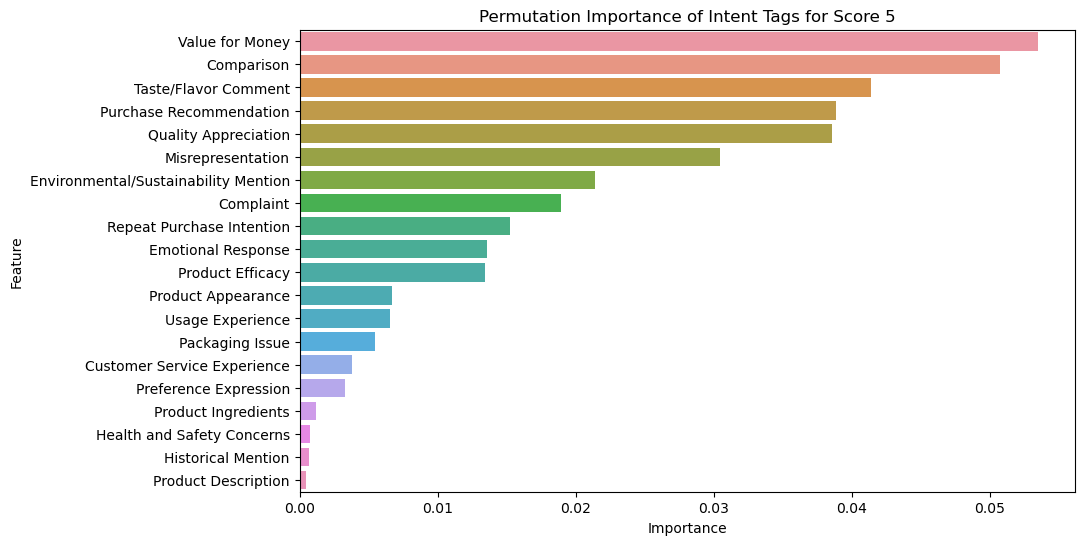

In [92]:
# Subset the data to focus on predictions of score 5
X_5 = X[paragraph_results_df['Predicted_Score'] == 5]
y_5 = y[paragraph_results_df['Predicted_Score'] == 5]

# Compute permutation importance on this subset
results = permutation_importance(clf, X_5, y_5, n_repeats=10, random_state=42, n_jobs=-1)

# Summarize results
feature_importances = results.importances_mean
features = X.columns

# Create a DataFrame for feature importances
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Permutation Importance of Intent Tags for Score 5')
plt.show()

In [93]:
def plot_permutation_importance_for_score(paragraph_results_df, score):
    """
    Function to compute and plot permutation importance for a specific customer score.

    Parameters:
    - paragraph_results_df: DataFrame containing the data
    - score: The specific customer score to analyze (1, 2, 3, 4, or 5)

    Returns:
    - A plot showing the permutation importance of intent tags for the specified score
    """
    # Prepare data for Random Forest
    X = paragraph_results_df.drop(columns=['P_index', 'P_index_numeric', 'Score', 'Summary', 'Paragraph', 'Predicted_Score'])
    y = paragraph_results_df['Score']

    # Train the Random Forest model
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Subset the data to focus on predictions of the specified score
    X_score = X[paragraph_results_df['Predicted_Score'] == score]
    y_score = y[paragraph_results_df['Predicted_Score'] == score]

    # Compute permutation importance on this subset
    results = permutation_importance(clf, X_score, y_score, n_repeats=10, random_state=42, n_jobs=-1)

    # Summarize results
    feature_importances = results.importances_mean
    features = X.columns

    # Create a DataFrame for feature importances
    feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

    # Sort by importance
    feature_df = feature_df.sort_values(by='Importance', ascending=False)
    print(feature_df)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_df)
    plt.title(f'Permutation Importance of Intent Tags for Score {score}')
    plt.show()


                                 Feature  Importance
7                      Misrepresentation    0.239026
6                              Complaint    0.204185
11                       Value for Money    0.185829
9                   Taste/Flavor Comment    0.165402
5                             Comparison    0.158554
12               Purchase Recommendation    0.102959
0                   Quality Appreciation    0.078886
19  Environmental/Sustainability Mention    0.061693
17             Repeat Purchase Intention    0.055141
18                    Emotional Response    0.043802
4                        Packaging Issue    0.036373
13                      Usage Experience    0.014340
2                     Product Appearance    0.013220
15            Health and Safety Concerns    0.012734
16           Customer Service Experience    0.010430
14                      Product Efficacy    0.010282
3                  Preference Expression    0.008792
10                   Product Ingredients    0.

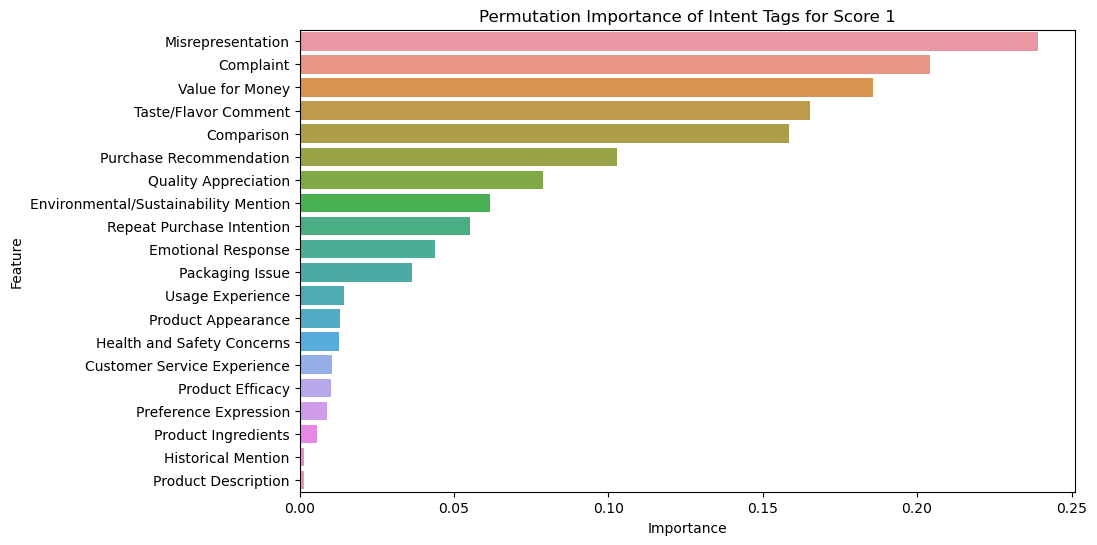

In [94]:
plot_permutation_importance_for_score(paragraph_results_df, 1)

                                 Feature  Importance
7                      Misrepresentation    0.508896
6                              Complaint    0.426913
11                       Value for Money    0.351724
9                   Taste/Flavor Comment    0.347501
5                             Comparison    0.328117
12               Purchase Recommendation    0.212202
0                   Quality Appreciation    0.158172
19  Environmental/Sustainability Mention    0.121526
17             Repeat Purchase Intention    0.093552
18                    Emotional Response    0.077372
4                        Packaging Issue    0.061681
2                     Product Appearance    0.041420
14                      Product Efficacy    0.026913
13                      Usage Experience    0.022159
15            Health and Safety Concerns    0.017853
3                  Preference Expression    0.017180
16           Customer Service Experience    0.016813
10                   Product Ingredients    0.

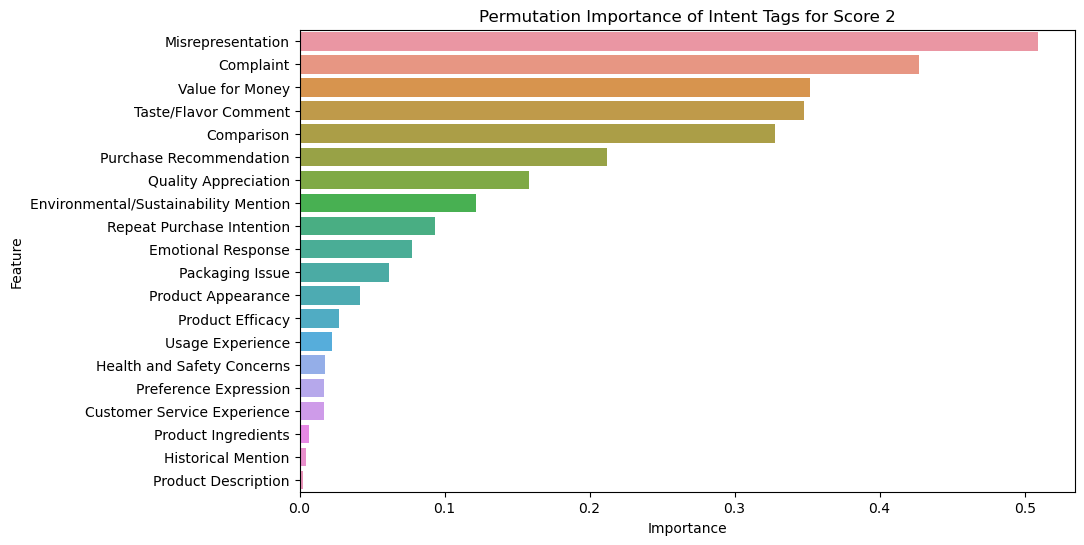

In [95]:
plot_permutation_importance_for_score(paragraph_results_df, 2)

                                 Feature  Importance
7                      Misrepresentation    0.458141
11                       Value for Money    0.445888
5                             Comparison    0.392415
6                              Complaint    0.342401
9                   Taste/Flavor Comment    0.341803
12               Purchase Recommendation    0.280008
0                   Quality Appreciation    0.237038
19  Environmental/Sustainability Mention    0.147319
17             Repeat Purchase Intention    0.109378
18                    Emotional Response    0.078091
4                        Packaging Issue    0.067644
14                      Product Efficacy    0.062601
2                     Product Appearance    0.055682
13                      Usage Experience    0.028397
3                  Preference Expression    0.025160
16           Customer Service Experience    0.017046
10                   Product Ingredients    0.010809
15            Health and Safety Concerns    0.

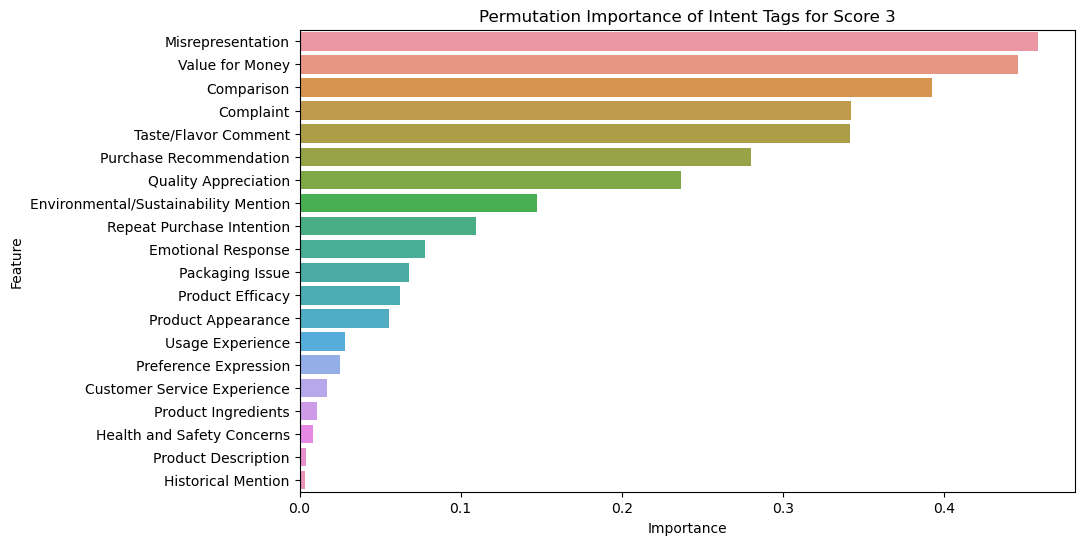

In [96]:
plot_permutation_importance_for_score(paragraph_results_df, 3)

                                 Feature  Importance
11                       Value for Money    0.648812
5                             Comparison    0.526501
12               Purchase Recommendation    0.512420
0                   Quality Appreciation    0.486143
9                   Taste/Flavor Comment    0.406784
7                      Misrepresentation    0.331350
19  Environmental/Sustainability Mention    0.229672
6                              Complaint    0.205837
14                      Product Efficacy    0.168296
17             Repeat Purchase Intention    0.162508
18                    Emotional Response    0.137757
2                     Product Appearance    0.085437
13                      Usage Experience    0.081318
4                        Packaging Issue    0.071724
3                  Preference Expression    0.038439
16           Customer Service Experience    0.029536
10                   Product Ingredients    0.012540
15            Health and Safety Concerns    0.

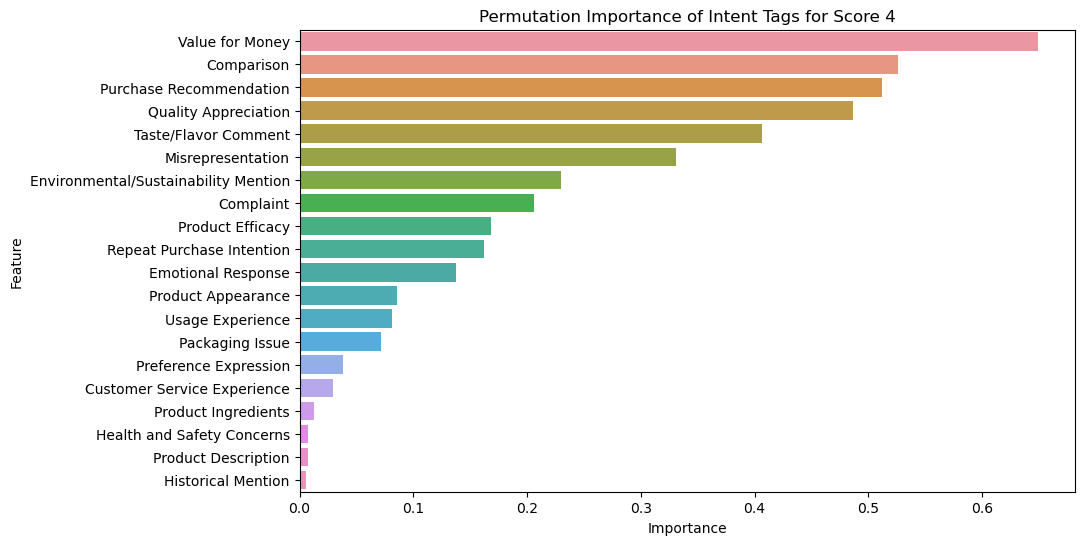

In [97]:
plot_permutation_importance_for_score(paragraph_results_df, 4)

                                 Feature  Importance
11                       Value for Money    0.052434
5                             Comparison    0.052124
9                   Taste/Flavor Comment    0.040533
12               Purchase Recommendation    0.040127
0                   Quality Appreciation    0.039701
7                      Misrepresentation    0.029771
19  Environmental/Sustainability Mention    0.021116
6                              Complaint    0.018620
17             Repeat Purchase Intention    0.014964
18                    Emotional Response    0.014124
14                      Product Efficacy    0.012437
13                      Usage Experience    0.007285
2                     Product Appearance    0.006533
4                        Packaging Issue    0.005371
16           Customer Service Experience    0.003571
3                  Preference Expression    0.003133
10                   Product Ingredients    0.001281
8                     Historical Mention    0.

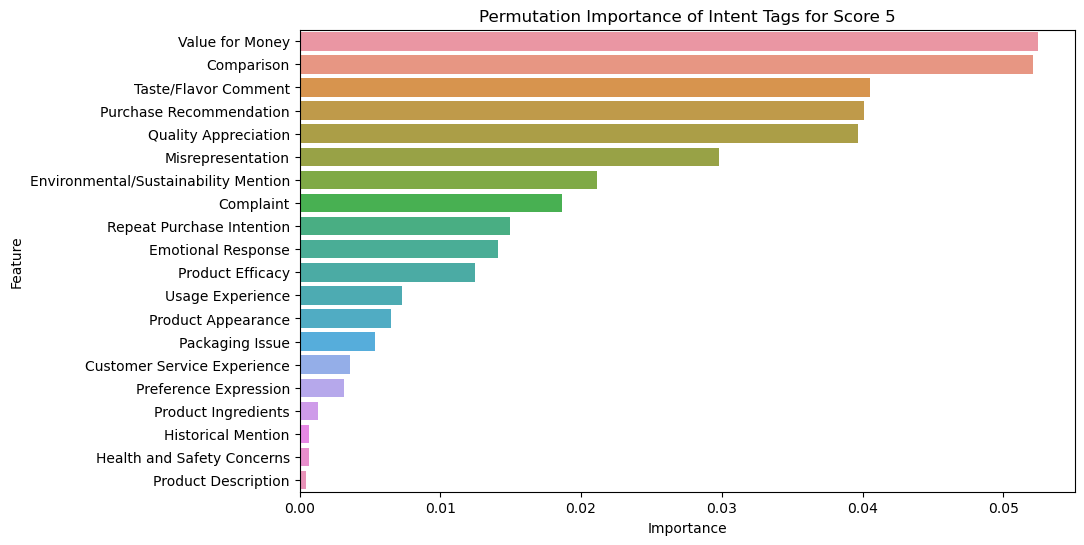

In [98]:
plot_permutation_importance_for_score(paragraph_results_df, 5)